In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import theano
import exoplanet as xo

from radvel._kepler import kepler_array as radvel_kepler
from batman._rsky import _getf as batman_kepler

%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4
pymc3 version: 3.6
exoplanet version: 0.1.7.dev0


/usr/share/miniconda/envs/exoplanet/lib/python3.7/site-packages/radvel/gp.py:33: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  Try installing celerite using 'pip install celerite'", ImportWarning)


In [3]:
np.random.seed(12345)
E = np.random.uniform(-np.pi, np.pi, 100000)

evals = np.linspace(0.01, 0.99, 10)

times_rv_mu = np.empty_like(evals)
times_rv_sd = np.empty_like(evals)
err_rv = np.empty((len(evals), 4))
times_xo_mu = np.empty_like(evals)
times_xo_sd = np.empty_like(evals)
err_xo = np.empty((len(evals), 4))
times_bm_mu = np.empty_like(evals)
times_bm_sd = np.empty_like(evals)
err_bm = np.empty((len(evals), 4))

for ie, e in enumerate(evals):
    M = E - e * np.sin(E)
    
    print("batman...")
    E0 = 2.*np.arctan(np.sqrt((1. - e)/(1. + e)))
    M0 = E0 - e*np.sin(E0);
    t = 0.5*(M - M0)/np.pi
    f_bm = batman_kepler(t, 0.0, 1.0, 1.0, 90.0, e, 0.0, 1, 1)
    E_bm = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(0.5*f_bm))
    assert np.all(np.isfinite(E_bm))
    results = %timeit -o batman_kepler(t, 0.0, 1.0, 1.0, 90.0, e, 0.0, 1, 1)
    times_bm_mu[ie] = np.mean(np.log10(results.all_runs)) - np.log10(results.loops)
    times_bm_sd[ie] = np.std(np.log10(results.all_runs))
    err = np.abs(E_bm - E)
    err_bm[ie] = np.percentile(err, [16, 50, 84, 90])
    
    print("radvel...")    
    E_rv = radvel_kepler(M, e)
    assert np.all(np.isfinite(E_rv))
    results = %timeit -o radvel_kepler(M, e)
    times_rv_mu[ie] = np.mean(np.log10(results.all_runs)) - np.log10(results.loops)
    times_rv_sd[ie] = np.std(np.log10(results.all_runs))
    err = np.abs(E_rv - E)
    err_rv[ie] = np.percentile(err, [16, 50, 84, 90])
    
    print("exoplanet...")
    op = xo.theano_ops.kepler.KeplerOp()
    func = theano.function([], op(M, e + np.zeros_like(M))[0])
    E_xo = func()
    assert np.all(np.isfinite(E_xo))
    results = %timeit -o func()
    times_xo_mu[ie] = np.mean(np.log10(results.all_runs)) - np.log10(results.loops)
    times_xo_sd[ie] = np.std(np.log10(results.all_runs))
    err = np.abs(E_xo - E)
    err_xo[ie] = np.percentile(err, [16, 50, 84, 90])

batman...


35.3 ms ± 653 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


20.5 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


80.8 µs ± 959 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


38.4 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


25.7 ms ± 573 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


79.9 µs ± 974 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


42.3 ms ± 995 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


26.5 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


78.1 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


42.7 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


25.8 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


81.4 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


43.8 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


26 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


79.2 µs ± 896 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


47.9 ms ± 471 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


26.4 ms ± 498 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


80.8 µs ± 763 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


48.2 ms ± 551 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


27.2 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


79.7 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


51.3 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


32.3 ms ± 621 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


81.4 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


54 ms ± 953 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


32.2 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


80.1 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
batman...


181 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
radvel...


38 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
exoplanet...


80.4 µs ± 983 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


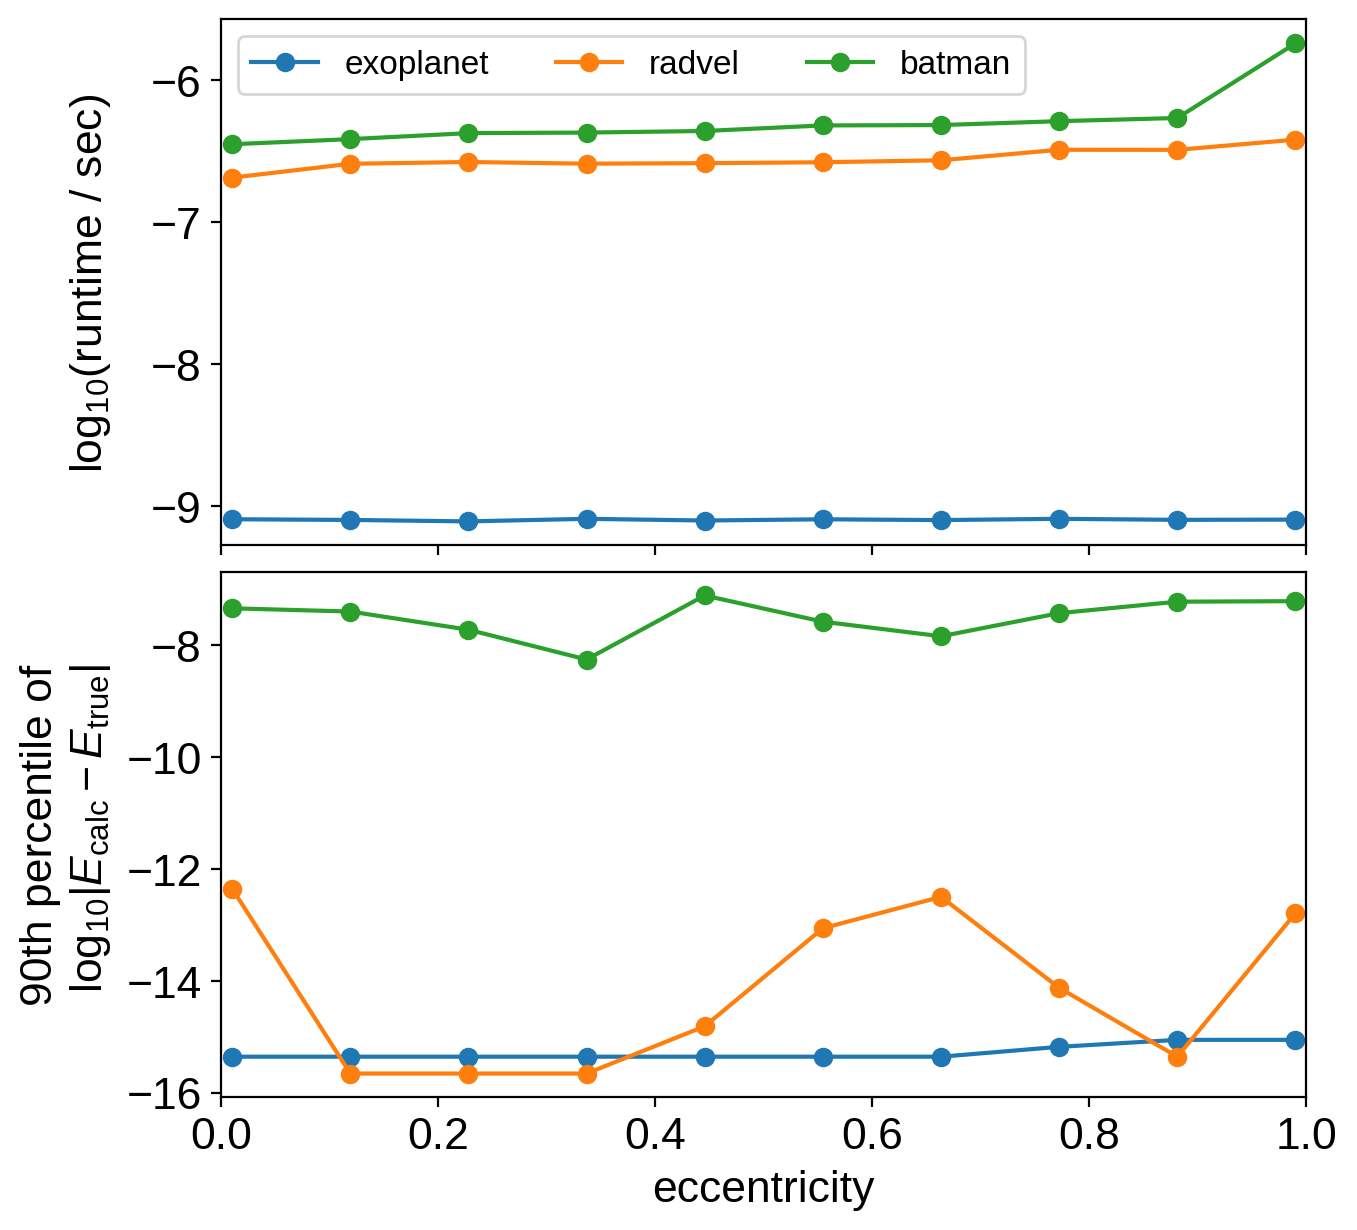

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

ax = axes[0]
ax.plot(evals, times_xo_mu - np.log10(len(E)), "o-", label="exoplanet")
ax.plot(evals, times_rv_mu - np.log10(len(E)), "o-", label="radvel")
ax.plot(evals, times_bm_mu - np.log10(len(E)), "o-", label="batman")
ax.set_ylabel(r"$\log_{10}$(runtime / sec)")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.legend(fontsize=12, ncol=3)

ax = axes[1]
plt.plot(evals, np.log10(err_xo[:, 3]), "o-", label="exoplanet")
plt.plot(evals, np.log10(err_rv[:, 3]), "o-", label="radvel")
plt.plot(evals, np.log10(err_bm[:, 3]), "o-", label="batman")
ax.set_xlim(0, 1)
ax.set_ylabel("90th percentile of\n $\log_{10}|E_\mathrm{calc} - E_\mathrm{true}|$")
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlabel("eccentricity")

fig.subplots_adjust(hspace=0.05)
fig.savefig("kepler_solver.pdf", bbox_inches="tight");